In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df_imp = pd.read_csv('/home/lishi/projects/Competition/kaggle_2023/data/lgb_models/lgb_v1v2v3/lgb_v1v2v3_feature_importance.csv')

Importance Threshold: 24790.536895542147
Number of less important features: 184


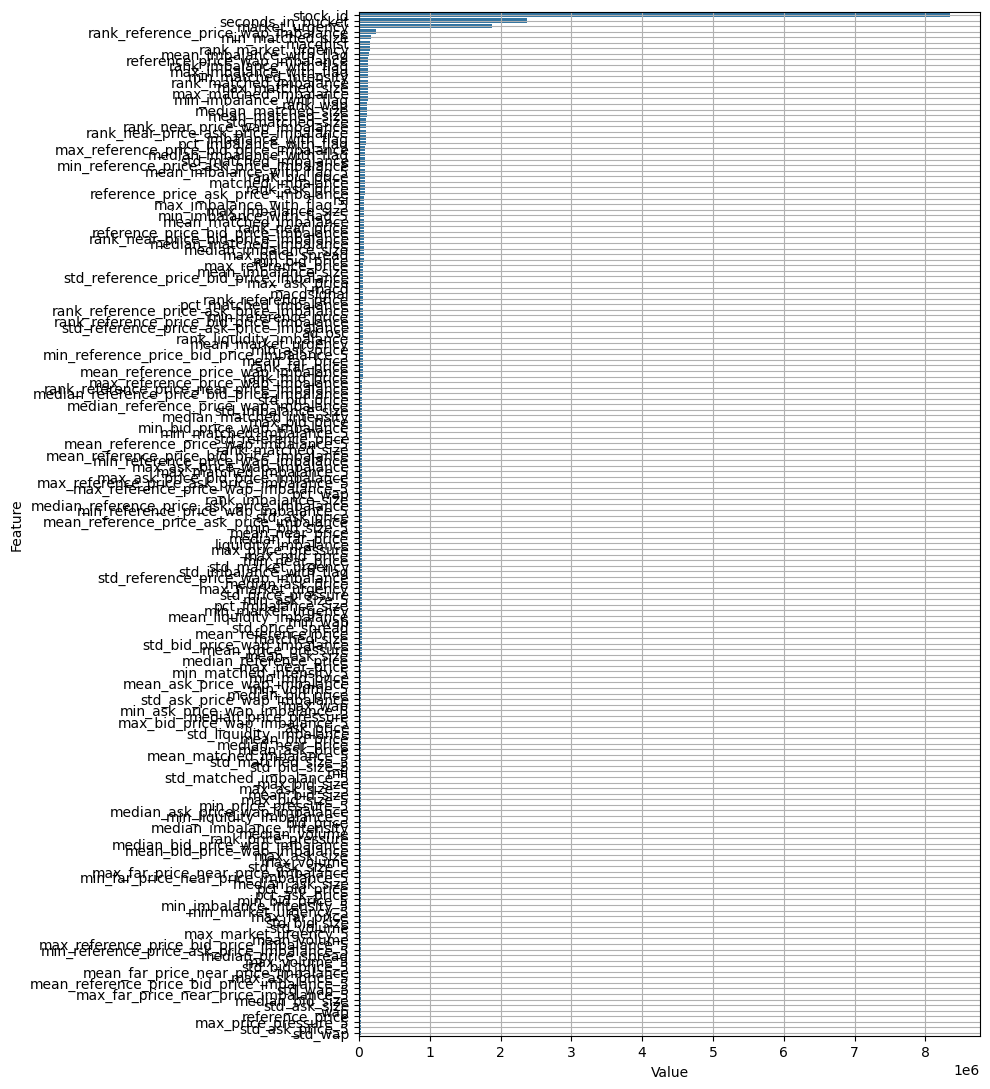

In [30]:
imp_thred = np.percentile(df_imp['Value'].values, 60)
more_important = df_imp[df_imp['Value'] > imp_thred]

print(f"Importance Threshold: {imp_thred}")
print(f"Number of less important features: {len(more_important)}")

fig, ax = plt.subplots(1, 1, figsize=(10, 11))

sns.barplot(x="Value", y="Feature", data=more_important[:], ax=ax)
ax.grid()
# ax.set_title(f"V{i+1} Features")
# ax.set_xlim(0, 2000)
plt.tight_layout()
plt.show()

In [32]:
['_'.join(x.split("_")[1:]) for x in 
 more_important[
    (more_important['Feature'].str.startswith('pct_')) 
    ]['Feature'].values
]

['imbalance_with_flag',
 'matched_imbalance',
 'wap',
 'imbalance_size',
 'bid_price',
 'ask_price']

In [33]:
set(
    ['_'.join(x.split("_")[1:-1]) for x in 
        more_important[
            (more_important['Feature'].str.endswith('_5')) 
            ]['Feature'].values
    ]
)

{'ask_price',
 'ask_price_wap_imbalance',
 'ask_size',
 'bid_price',
 'bid_price_wap_imbalance',
 'bid_size',
 'far_price_near_price_imbalance',
 'imbalance_intensity',
 'imbalance_with_flag',
 'liquidity_imbalance',
 'market_urgency',
 'matched_imbalance',
 'matched_intensity',
 'matched_size',
 'price_pressure',
 'reference_price_ask_price_imbalance',
 'reference_price_bid_price_imbalance',
 'reference_price_wap_imbalance',
 'volume',
 'wap'}

In [18]:
set(
    ['_'.join(x.split("_")[1:]) for x in 
        more_important[
            (more_important['Feature'].str.startswith('rank_')) 
            ]['Feature'].values
    ]
)

{'ask_price_bid_price_imbalance',
 'ask_size',
 'bid_size',
 'depth_pressure',
 'matched_intensity',
 'price_spread',
 'size_imbalance',
 'volume'}

In [19]:
df_imp[
    (df_imp['Feature'].str.endswith('_5')) &
    (df_imp['Feature'].str.contains('far')) & 
    (~df_imp['Feature'].str.contains('imbalance')) 
    ]

,Feature,Value


In [20]:
v3_rolling_features_all =  [f for f in df_imp['Feature'].values if f.endswith('_5')]
print(f"Number of rolling features: {len(v3_rolling_features_all)}")

Number of rolling features: 42


In [21]:
v2_max_features_all =  [f for f in df_imp['Feature'].values if f.startswith('max_')]

In [22]:
features = less_important['Feature'].values

v3_pct_features = [f for f in features if f.startswith('pct_')]
v3_rolling_features = [f for f in features if f.endswith('_5')]
v2_mean_features = [f for f in features if f.startswith('mean_') & ~f.endswith('_5')]
v2_min_features = [f for f in features if f.startswith('min_') & ~f.endswith('_5')]
v2_max_features = [f for f in features if f.startswith('max_') & ~f.endswith('_5')]
v2_median_features = [f for f in features if f.startswith('median_') & ~f.endswith('_5')]
v2_std_features = [f for f in features if f.startswith('std_') & ~f.endswith('_5')]

print(f"V3 Pct Features: {len(v3_pct_features)}")
print(f"V3 Rolling Features: {len(v3_rolling_features)}")
print(f"V2 Mean Features: {len(v2_mean_features)}")
print(f"V2 Min Features: {len(v2_min_features)}")
print(f"V2 Max Features: {len(v2_max_features)}")
print(f"V2 Median Features: {len(v2_median_features)}")
print(f"V2 Std Features: {len(v2_std_features)}")


NameError: name 'less_important' is not defined

In [ ]:
v3_rolling_features

In [ ]:
v2_min_features

In [ ]:
v2_mean_features

In [ ]:
v2_std_features

In [ ]:
'prices': ["reference_price", "far_price", "near_price", "ask_price", "bid_price", "wap"],

In [ ]:
from itertools import combinations

for c in combinations(["reference_price", "far_price", "near_price", "ask_price", "bid_price", "wap"], 2):
    if ('far_price' in c) and ('near_price' in c):
        print(c)
    else:
        if ('far_price' in c) or ('near_price' in c):
            pass 
        else:
            print(c[0], c[1])

In [ ]:
df_imp[df_imp['Feature'].isin()]

In [ ]:
price_tag = "far_price"

In [ ]:
df_imp[
    (df_imp['Feature'].str.contains(price_tag)) & 
    (df_imp['Feature'].str.endswith('_5')) & 
    (df_imp['Feature'].str.startswith('mean_')) 
    ]

In [ ]:
df_imp[
    (df_imp['Feature'].str.contains(price_tag)) & 
    (df_imp['Feature'].str.endswith('_5')) & 
    (df_imp['Feature'].str.startswith('max_')) 
    ]

In [ ]:
df_imp[
    (df_imp['Feature'].str.contains(price_tag)) & 
    (df_imp['Feature'].str.endswith('_5')) & 
    (df_imp['Feature'].str.startswith('min_')) 
    ]

In [ ]:
df_imp[
    (df_imp['Feature'].str.contains(price_tag)) & 
    (df_imp['Feature'].str.endswith('_5')) & 
    (df_imp['Feature'].str.startswith('std_')) 
    ]